# Introduction
PCA is useful for reducing dimensionality. Some learning algorithms do not handle high dimensionality data very well.

In this exercise, we will experiment with reducing dimensionality even though both data sets we are using work fine without PCA. 

PCA is also useful for removing colinearity. When we have data that is colinear, a traditional solver for linear or logistic regression will have problems with it. This is due to the fact that the matrix algebra will have a non-unique solution. Modern regression libraries can handle much of this for us and still find a solution.  

In the examples in this exercise, we will start with the Iris dataset and use PCA for visualization. Next, we will take another data set and reduce the dimensionality, then show that the accuracy was not substantially impacted by the reduced number of dimensions.

The data set I selected for the second part looks like it already has some transformations and normalizations applied to it so you will not notice a massive reduction in the number of features.

**Student name**:

**Pair programming partner**:

# Step 0
Make a copy of the notebook in your Google Drive

# A few imports


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Problem 1 (10 points)
* Load the Iris dataset
* Use PCA to reduce the dimensionality to 2 components
* Create a scatter plot using the 2 components
  * Color the points based on the label

0     -2.684207
1     -2.715391
2     -2.889820
3     -2.746437
4     -2.728593
         ...   
145    1.944017
146    1.525664
147    1.764046
148    1.901629
149    1.389666
Name: PC1, Length: 150, dtype: float64


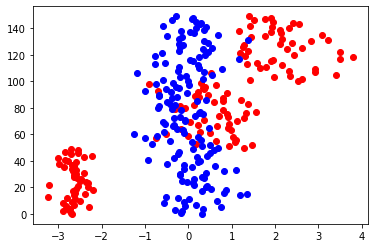

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                names = ['sepal length','sepal width', 'petal length', 'petal width', 'target'])
# print(df.to_string())

#Standardizing the data using the StandardScaler()
f = ['sepal length','sepal width', 'petal length', 'petal width']
x = df.loc[:,f].values
y = df.loc[:,['target']].values
X = StandardScaler().fit_transform(x)
# print(x)

#Using PCA to tranform the dataset into 2D
pca = PCA(n_components=2)
PC = pca.fit_transform(x)
#naming columns
Pdf = pd.DataFrame(data=PC, columns = ['PC1', 'PC2'])
# print(Pdf.to_string())
print(Pdf['PC1'])


#creating visualization of PC1 and PC2 
a=[]
for j in range(150):
  a.append(j)
plt.scatter(Pdf['PC1'],a, color='red')
plt.scatter(Pdf['PC2'],a, color='blue')
plt.show()

# Problem 2 (20 points)
* Use the credit card fraud data that is stored on the shared Google drive
* There are 29 features and 2 classes in the data.
* Remove the Time column. It is not a useful feature


## Read the data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Change this path to where you move the file
# https://drive.google.com/drive/folders/15Y6nCX_0LrXQNe4NTWiEV2ev4Rv3feEf
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv
# path = "/content/drive/Shareddrives/CS450Fall2022_Wilson/CS450 Share/CSV Files/creditcard.csv"
path = "/content/drive/MyDrive/creditcard.csv"
# Change the path to where you copy the file
dfFraud = pd.read_csv(path)
dfFraud = dfFraud.drop('Time', axis=1)

Mounted at /content/drive


In [ ]:
# print(dfFraud[dfFraud['class'] == 1])
display(dfFraud.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
display(dfFraud.dtypes)

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
class       int64
dtype: object

## Create a model using multiple logistic regression
* Use an 80/20 test/train split

In [ ]:
#creating my list of 'predictor variables' and 'actual variables' where actual is whether it was fraud or not -- 0 means no fraud
predVar = dfFraud[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14',
                  'V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']]
actual = dfFraud['class']

#splitting the data -- 80/20
X_train, X_test, Y_train, Y_test = train_test_split(predVar, actual,test_size = 0.2, random_state = 100)

#creating binomial logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

coefficients = model.coef_  #I will need these later...i think
# print(coefficients)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Test the model
* Show the confusion matrix using test data
* Evaluate the F1 score of the model

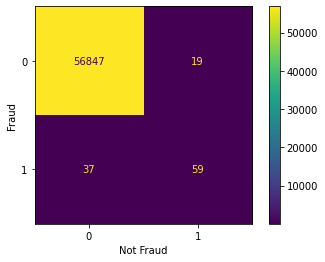

Precision:  0.7564102564102564
Recall: 0.6145833333333334
f1:  0.9989661156392876


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
#printing accuracy of the model
Acc = accuracy_score(Y_test, predictions)
# print(Acc)

#creating a confusion matrix to visualize
Conf = confusion_matrix(Y_test, predictions)
confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=Conf)
confusion_matrix.plot()
plt.ylabel('Fraud')
plt.xlabel('Not Fraud')
plt.show()
#Top Left: True Positives -- our model thought it was fraud and it was right
#Bottom Left: False Negatives -- our model though it was not fraud, but it was
#Top Right: False Positives -- our model thought it was fraud, but it was not
#Bottom Right: True Negatives -- our model though it was not fraud and it was not

#calculating precision and recall
#precision = True Positives / (True Positives + False Positives)
#recall = True Positives / (True Positives + False Negatives)
# precision =  56847/(56847+19) #these are wrong and I dont know why
# recall = 56847/(56847+37)

#seeing if I was correct in finding the precision and recall manually......(edit): i wasnt 
precision = precision_score(Y_test,predictions)
recall = recall_score(Y_test,predictions)
print("Precision: ",precision)
print("Recall:", recall)
#getting f1 score from precision and recall manually...
# f1 = 2*(precision*recall)/(precision + recall)  # this is wrong and I dont know why
f1 = f1_score(Y_test, predictions, average='weighted')
print("f1: ",f1)

## Transform the data using PCA
* Reduce the feature set to the number of components that explain 90% of the variance

### Show how much each original feature conributed to the remaining components


In [ ]:
#creating pca with original dfFraud -- just to look at all of the variation of each principal component
# pca=PCA(n_components=29)
# pca.fit(predVar)
# print(pca.explained_variance_ratio_)

#creating pca only with components that explain 90% of variation
pca = PCA(n_components=.90)
pca_data = pca.fit_transform(predVar)
print("{} Principal Components are required to explain {} of the variation in this data.".format(pca.n_components_,0.9))
# print(pca_data.shape)
cumsum = np.cumsum(pca.explained_variance_ratio_)
#printing total variance explained by the new components
print(np.cumsum(pca.explained_variance_ratio_))
# dim = np.arange(len(cumsum))+1

# plt.plot(dim,cumsum,'-',lw=3);

1 Principal Components are required to explain 0.9 of the variation in this data.
[0.99953802]


## Split test and train data on the transformed data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(pca_data, actual,test_size = 0.2, random_state = 100)

## Train the model using PCA transformed data

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

## Test the model using the tranformed test data
* Show the confusion matrix
* Calculate the F1 score

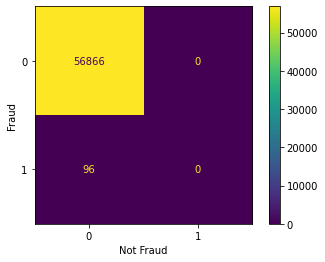

Precision:  0.0
Recall: 0.0
f1:  0.9974727095630586


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
#printing accuracy of the model
Acc = accuracy_score(Y_test, predictions)
# print(Acc)

#creating a confusion matrix to visualize
Conf = confusion_matrix(Y_test, predictions)
confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=Conf)
confusion_matrix.plot()
plt.ylabel('Fraud')
plt.xlabel('Not Fraud')
plt.show()
#Top Left: True Positives -- our model thought it was fraud and it was right
#Bottom Left: False Negatives -- our model though it was not fraud, but it was
#Top Right: False Positives -- our model thought it was fraud, but it was not
#Bottom Right: True Negatives -- our model though it was not fraud and it was not

#calculating precision and recall
#precision = True Positives / (True Positives + False Positives)
#recall = True Positives / (True Positives + False Negatives)
# precision =  56847/(56847+19) #these are wrong and I dont know why
# recall = 56847/(56847+37)

#seeing if I was correct in finding the precision and recall manually......(edit): i wasnt 
precision = precision_score(Y_test,predictions)
recall = recall_score(Y_test,predictions)
print("Precision: ",precision)
print("Recall:", recall)
#getting f1 score from precision and recall manually...
# f1 = 2*(precision*recall)/(precision + recall)  # this is wrong and I dont know why
f1 = f1_score(Y_test, predictions, average='weighted')
print("f1: ",f1)